## SVD 추천시스템
1. 서프라이즈를 사용한 ML-100K 추천 시스템
1. SVD를 사용하기
1. K값을 바꿔가면서 비교, 최적의 K를 찾기
1. K를 x축, 성능(RMSE)를 y축으로 해서 시각화

In [3]:
import pandas as pd
import surprise

In [4]:
rating_df = pd.read_csv('u.data', sep='\t', header=None, names = ['userID', 'movieID', 'rating', 'timestamp'])

In [5]:
pv_tb = pd.pivot_table(data = rating_df, values = 'rating', index = 'movieID', columns = 'userID').fillna(0)
pv_tb

userID,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movieID,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
2,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
from surprise import Dataset, SVD, Reader, accuracy
# from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

reader = Reader(line_format="user item rating", sep="\t") 
data = Dataset.load_from_df(rating_df[['userID', 'movieID', 'rating']], reader=reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)
li = []
for fac in range(2, 100):
    svd = SVD(n_factors = fac)
    svd.fit(trainset)
    li.append(accuracy.rmse(svd.test(testset)))

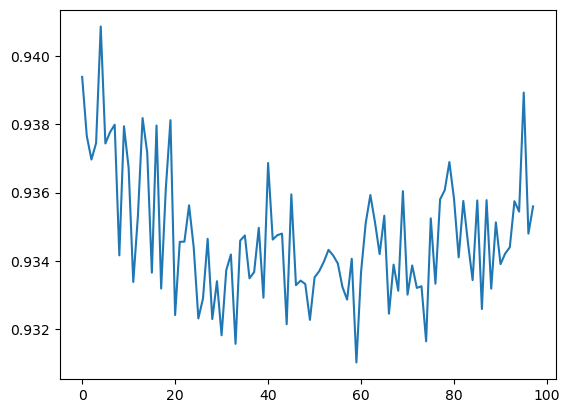

In [14]:
import matplotlib.pyplot as plt
plt.plot(li)

In [ ]:
min(li)

0.9310288898580752

In [20]:
rating_df.shape

(100000, 4)

In [30]:
test = pd.read_csv('C:\Code\skkukdt_minzy\dataset\dest.csv', sep = '|', header = None)
test.columns = ['r', 'rmse']

In [31]:
test

,r,rmse
0,RMSE,0.9392
1,RMSE,0.9377
2,RMSE,0.9359
3,RMSE,0.9364
4,RMSE,0.9373
...,...,...
2718,RMSE,1.0175
2719,RMSE,1.0163
2720,RMSE,1.0113
2721,RMSE,1.0200


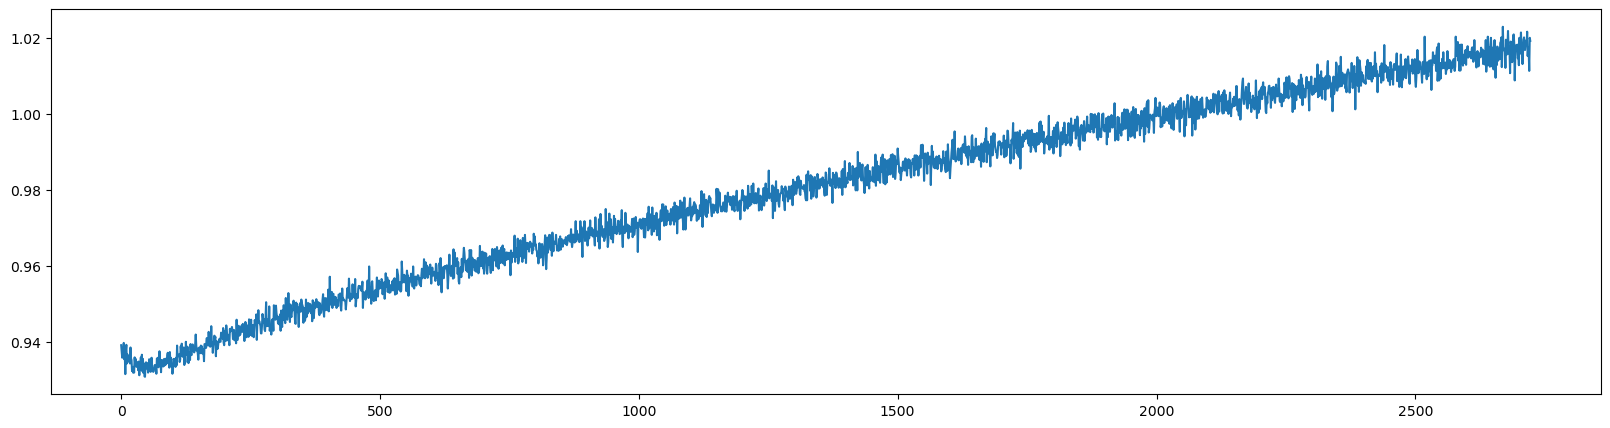

In [37]:

plt.figure(figsize=(20, 5))
plt.plot(test['rmse'])
plt.show()

In [33]:
test['rmse'].min()

0.9309

In [35]:
test['rmse'].argmin()

46

In [39]:
svd = SVD(n_factors = 46)
svd.fit(trainset)
print(accuracy.rmse(svd.test(testset)))
svd = SVD(n_factors = 47)
svd.fit(trainset)
print(accuracy.rmse(svd.test(testset)))
svd = SVD(n_factors = 48)
svd.fit(trainset)
print(accuracy.rmse(svd.test(testset)))

RMSE: 0.9345
0.9345102387333207
RMSE: 0.9321
0.9321299183776663
RMSE: 0.9330
0.9329962140181844
